In [2]:
import pandas as pd

In [3]:
# 데이터 불러오기
df = pd.read_csv('data/펫미업 - 6개월치 예약목록 - 20181029.csv', header=1)

# Data Visualization

데이터 시각화 라이브러리인 **matplotlib**와 **seaborn**을 함께 사용하고자 합니다. 어떤 그래프를 그리냐에 따라 더 편리한 것을 사용합니다.

https://matplotlib.org/

https://seaborn.pydata.org/

In [4]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 별도의 창이 아니라 노트북에 그래프가 표시되도록 함
%matplotlib inline 

# 캔바스 공간 크기 지정
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [5]:
# [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

In [6]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

#한글 폰트 설정하기
# plt.rcParams["font.family"] = 'Nanum Brush Script OTF'
plt.rcParams["font.family"] = 'NanumGothicOTF'
plt.rcParams["font.size"] = 20

## Line Chart

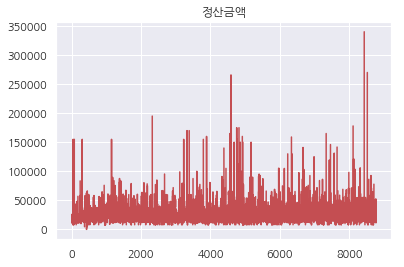

In [7]:
plt.plot(df['정산금액'],'r')
plt.title('정산금액')
plt.show()

In [8]:
df.columns

Index(['예약코드', '접수일자', '예약일자', '예약시간', '종료시간', '예약형태', '방문경로', '예약상태', '동승자수',
       '지불방식', '운행요금방식', '정산금액', '기본요금', '미터기요금', '반려동물추가요금', '세탁요금', '상품판매요금',
       '경유지요금', '기타요금', '할인요금', '사용정기권코드', '고객명', '고객ID', '고객형태', '고객등급',
       '고객연락처', '고객등록일자', '접수자', '운전자', '운전자연락처', '출발지', '도착지', '경유지',
       '이동거리(Km)', '이동시간(분)', '미터기시작위치', '미터기시작시간', '정산완료위치', '정산완료시간', '예약메모',
       '정산메모', '고객리뷰', '고객평점'],
      dtype='object')

## Bar Chart

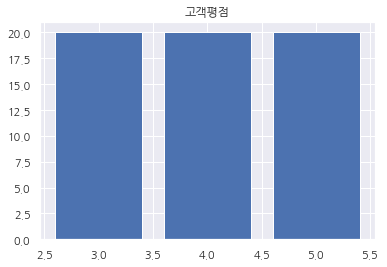

In [26]:
plt.bar(df['고객평점'], 20)
plt.title('고객평점')
plt.show()

## Scatter Chart

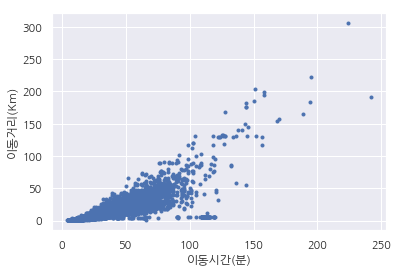

In [24]:
plt.plot(df['이동시간(분)'], df['이동거리(Km)'], '.')
plt.xlabel("이동시간(분)")
plt.ylabel("이동거리(Km)")
plt.show()

## Histogram Chart

In [10]:
# df.groupby('고객등급').count()

In [11]:
# sns.distplot(df['정산금액'], kde=False, rug=True);

In [12]:
df['정산금액'].describe()

count      5813.000000
mean      25889.548598
std       18677.942514
min           0.000000
25%       15400.000000
50%       20400.000000
75%       30400.000000
max      340100.000000
Name: 정산금액, dtype: float64

/Users/danolee/.pyenv/versions/3.6.3/envs/default/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/danolee/.pyenv/versions/3.6.3/envs/default/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


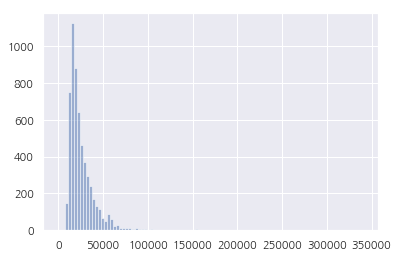

In [13]:
plt.hist(df['정산금액'], alpha=.5, bins=100)
plt.show()

In [14]:
# grid = sns.FacetGrid(df, size=10, aspect=2)
# grid.map(plt.hist, '정산금액', alpha=.5, bins=100)

### Visualization Helper Functions

correlation map을 그리기 위한 함수입니다. 다른 노트북에서 필요한 경우 아래 코드를 복사해서 사용하면 됩니다. (굳이 내용을 이해하지 않아도 됩니다.)

In [15]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

### Correlation Map 살펴보기

다음 메소드를 이용하면 각 데이터 간의 상관관계를 표로 확인할 수 있습니다.
    
    DataFrame.corr()

In [16]:
df.corr()

,동승자수,정산금액,기본요금,미터기요금,반려동물추가요금,세탁요금,상품판매요금,경유지요금,기타요금,할인요금,이동거리(Km),이동시간(분),고객평점
동승자수,1.000000,0.072417,0.010722,0.078001,0.016297,-0.021796,0.025995,0.098527,0.001432,0.010760,0.100580,0.012293,0.122810
정산금액,0.072417,1.000000,0.081231,0.936680,0.068152,0.086385,0.004478,0.050292,0.360217,0.014204,0.926239,0.775852,-0.197567
기본요금,0.010722,0.081231,1.000000,0.069236,0.009763,0.011006,0.003818,0.025577,0.009394,-0.002727,0.069048,0.084852,-0.097028
미터기요금,0.078001,0.936680,0.069236,1.000000,0.034760,0.022246,0.003160,0.046083,0.022422,0.075774,0.881127,0.760335,-0.045718
반려동물추가요금,0.016297,0.068152,0.009763,0.034760,1.000000,0.010945,-0.000879,-0.003709,0.023936,0.002502,0.034214,0.034878,NaN
세탁요금,-0.021796,0.086385,0.011006,0.022246,0.010945,1.000000,-0.000990,-0.004181,-0.003280,0.023045,0.015091,0.031111,NaN
상품판매요금,0.025995,0.004478,0.003818,0.003160,-0.000879,-0.000990,1.000000,-0.001454,-0.001667,-0.002944,-0.004008,0.001233,NaN
경유지요금,0.098527,0.050292,0.025577,0.046083,-0.003709,-0.004181,-0.001454,1.000000,-0.006240,-0.003753,0.033493,0.057314,NaN
기타요금,0.001432,0.360217,0.009394,0.022422,0.023936,-0.003280,-0.001667,-0.006240,1.000000,-0.008753,0.320377,0.200149,-0.217502
할인요금,0.010760,0.014204,-0.002727,0.075774,0.002502,0.023045,-0.002944,-0.003753,-0.008753,1.000000,0.057028,0.050598,-0.131033


아래 함수에 DataFrame을 넣으면 상관 관계를 그래프로 보여 주는 함수입니다.

    plot_correlation_map(df)

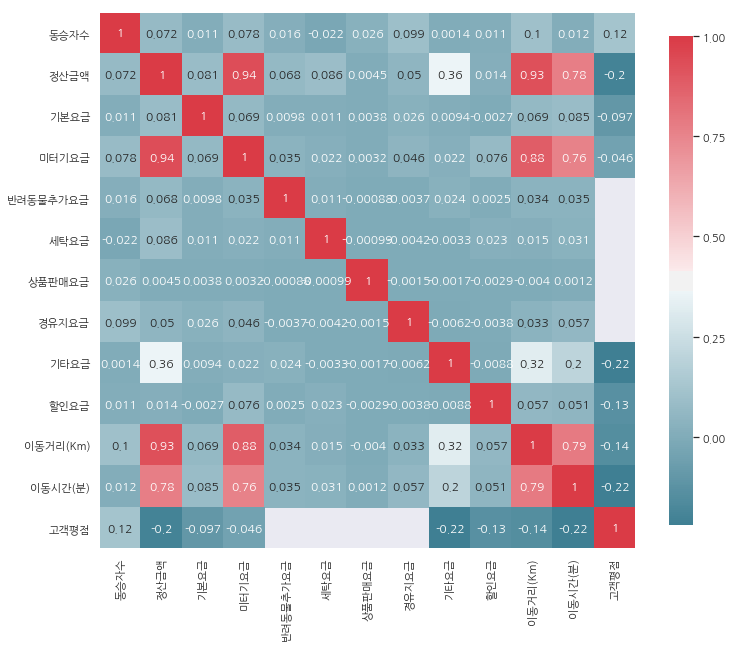

In [17]:
plot_correlation_map(df)